### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

#### 解答
##### 1.删除重复数据，并输出去重前后的数据量

In [2]:
import pandas as pd
raw_data = pd.read_csv('data/github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]

In [17]:
print("去重前数据量:", data.shape[0])

data_deduped = data.drop_duplicates()

print("去重后数据量:", data_deduped.shape[0])

去重前数据量: 20358
去重后数据量: 19779


##### 2.缺失值处理

In [3]:
# 2.1 去掉 gravatar_id 列，并查看各列的缺失值情况
if 'gravatar_id' in raw_data.columns:
    raw_data = raw_data.drop(columns=['gravatar_id'])
print("各列的缺失值情况（去掉 gravatar_id 后）:")
print(raw_data.isnull().sum())

各列的缺失值情况（去掉 gravatar_id 后）:
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2654
company                 9229
blog                   11601
location                7287
email                  12079
hireable               16956
bio                    11262
twitter_username       15297
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64


In [4]:
data=raw_data

bool_columns = ['company', 'location', 'blog', 'email', 'hireable', 'bio', 'twitter_username']
for col in bool_columns:
    data.loc[:, col] = data[col].notnull()

text_columns = ['name', 'company', 'blog', 'location', 'email', 'bio', 'twitter_username']
for col in text_columns:
    data.loc[:, col] = data[col].fillna('')

print("\n缺失值情况（转换和填充后）：")
print(data.isnull().sum())


缺失值情况（转换和填充后）：
actor_id               0
label                  0
login                  0
id                     0
node_id                0
avatar_url             0
url                    0
html_url               0
followers_url          0
following_url          0
gists_url              0
starred_url            0
subscriptions_url      0
organizations_url      0
repos_url              0
events_url             0
received_events_url    0
type                   0
site_admin             0
name                   0
company                0
blog                   0
location               0
email                  0
hireable               0
bio                    0
twitter_username       0
public_repos           0
public_gists           0
followers              0
following              0
created_at             0
updated_at             0
dtype: int64


##### 3. 数据变换，将created_at、updated_at转为时间戳

In [5]:
#3.数据变换，将created_at、updated_at转为时间戳

data['created_at'] = pd.to_datetime(data['created_at']).astype('int64') // 10**9
data['updated_at'] = pd.to_datetime(data['updated_at']).astype('int64') // 10**9

print(data[['created_at', 'updated_at']].head())


   created_at  updated_at
0  1317058023  1697196070
1  1435572766  1696659974
2  1220026803  1696212681
3  1400611389  1697115299
4  1345126753  1696593521


##### 4. 数据可视化
  4.1 
- 条形图选择原因：它可以根据数据的大小自动调整条形的长度，确保在不同的数据规模下都能清晰地展示数量情况。
- 结果分析：数据显示 `human` 类型用户明显多于 `bot` 类型用户，表明 GitHub 平台主要由 `human` 用户组成，而 `bot` 账号占比较小。
- 洞察：大多数用户是 `human` 类型，这符合平台用户特征。若 `bot` 类型数量较多，可能需要进一步分析是否存在异常用户行为或自动化操作比例较高的情况。


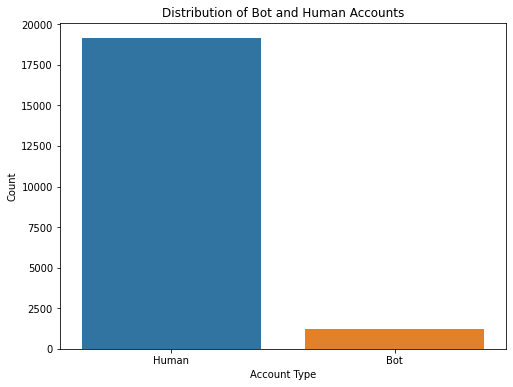

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


bool_columns = ['company', 'location', 'email', 'hireable']
for col in bool_columns:
    data[col] = data[col].notnull()

text_columns = ['name', 'bio', 'twitter_username']
for col in text_columns:
    data[col] = data[col].fillna('')

data['created_at'] = pd.to_datetime(data['created_at']).astype('int64') // 10**9
data['updated_at'] = pd.to_datetime(data['updated_at']).astype('int64') // 10**9

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='label')
plt.title("Distribution of Bot and Human Accounts")
plt.xlabel("Account Type")
plt.ylabel("Count")
plt.show()


4.2 

- 柱状图：柱状图能够有效地展现数据在时间维度上的分布状况。可用于对“bot”账号创建的趋势进行分析，以了解是否在特定时期出现大量注册的情况。

- “bot”类型账号在某一个时间段突然大量增加，这或许表明在该时期存在自动化工具的集中部署，或者某些自动化任务在这个时间段集中增多，但近来又有所减少。

- 数据洞察：观察“bot”账号的创建时间分布，有助于了解 GitHub 平台上自动化操作的增长趋势，并且能为安全监控提供信息，特别是如果发现异常波动，可能会提示自动化账户激增的时间段。



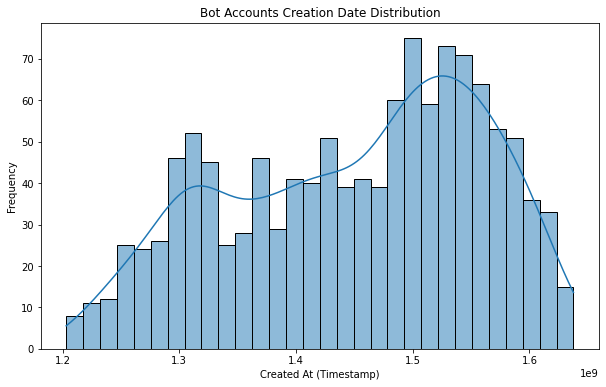

In [12]:
data = pd.read_csv('data/github_bot_raw_data.csv')

data = data.drop(columns=['gravatar_id'])

bool_columns = ['company', 'location', 'email', 'hireable']
for col in bool_columns:
    data[col] = data[col].notnull()

text_columns = ['name', 'bio', 'twitter_username']
for col in text_columns:
    data[col] = data[col].fillna('')

data['created_at'] = pd.to_datetime(data['created_at']).astype('int64') // 10**9
data['updated_at'] = pd.to_datetime(data['updated_at']).astype('int64') // 10**9
bot_data = data[data['label'] == 'Bot']


plt.figure(figsize=(10, 6))
sns.histplot(bot_data['created_at'], kde=True, bins=30)
plt.title("Bot Accounts Creation Date Distribution")
plt.xlabel("Created At (Timestamp)")
plt.ylabel("Frequency")
plt.show()


4.3
- 时间序列图：时间序列图非常适合用来呈现“human”用户创建账号的长期发展趋势，尤其在分析平台用户活跃度以及增长的变化方面表现出色。

- 结果分析：人类用户的账号注册数量呈现稳步上升的态势，但在近两年，注册量却逐渐降低。这或许反映出 GitHub 作为开发者平台，其流行程度有所下降。

- 数据洞察：这个图表有助于了解平台用户基数增长的趋势以及开发者社区的增长速度。它可以为 GitHub 提供未来用户增长预测的依据。

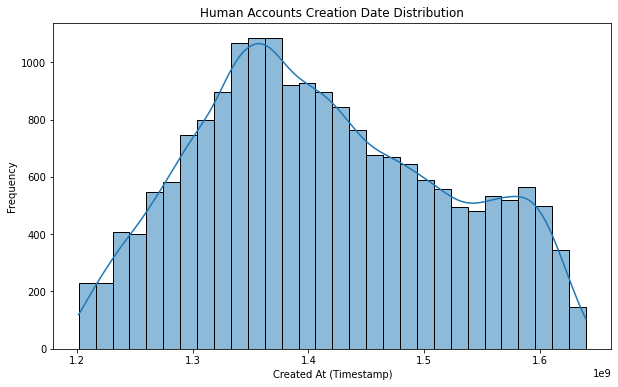

In [13]:
human_data = data[data['label'] == 'Human']

plt.figure(figsize=(10, 6))
sns.histplot(human_data['created_at'], kde=True, bins=30)
plt.title("Human Accounts Creation Date Distribution")
plt.xlabel("Created At (Timestamp)")
plt.ylabel("Frequency")
plt.show()

4.4 
- 散点图：散点图能够展现“followers”与“following”之间的关联，而箱线图则更适合展示这两个数值的分布区间和极端情况，有助于对“bot”账号的粉丝数量和关注量分布进行分析。

- 结果分析：大部分“bot”类型的账号，其“followers”和“following”数值都比较低，然而有部分异常的“bot”账号“followers”数量较高。这或许意味着部分“bot”账号通过自动关注或者关注回粉等策略来积累粉丝。

- 数据洞察：对“bot”账号的粉丝数量和关注量进行分析，可以帮助识别出异常的“bot”活动（例如恶意营销等），同时也能够理解平台中常规“bot”账号的行为模式。

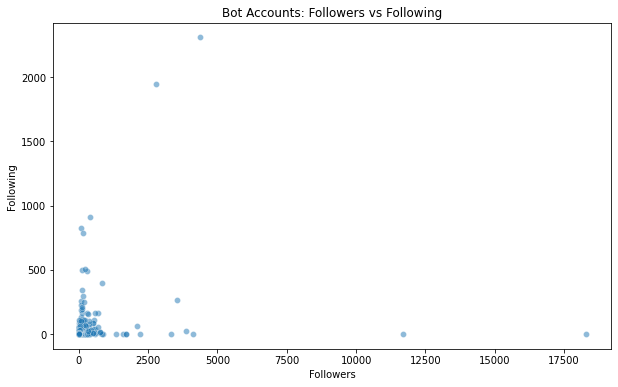

In [14]:


plt.figure(figsize=(10, 6))
sns.scatterplot(data=bot_data, x='followers', y='following', alpha=0.5)
plt.title("Bot Accounts: Followers vs Following")
plt.xlabel("Followers")
plt.ylabel("Following")
plt.show()

4.5 

- 散点图：对于“human”用户而言，在“followers”（粉丝数）和“following”（关注数）方面可能呈现出更大的差异。尤其是影响力较大的用户，极有可能拥有数量极高的粉丝，然而部分用户的关注数却相对较少。

- 结果分析：绝大多数“human”用户的“followers”和“following”数值都比较低，不过也有一些用户的“followers”数量极高，这充分表明在“human”用户群体当中存在着少数具有高影响力的账号。

- 数据洞察：深入理解“human”用户的粉丝数量和关注量的分布情况，能够帮助我们识别出 GitHub 社区里活跃度较高或者影响力较大的用户群体。此类信息在社群构建以及内容分发等方面具备重大意义。


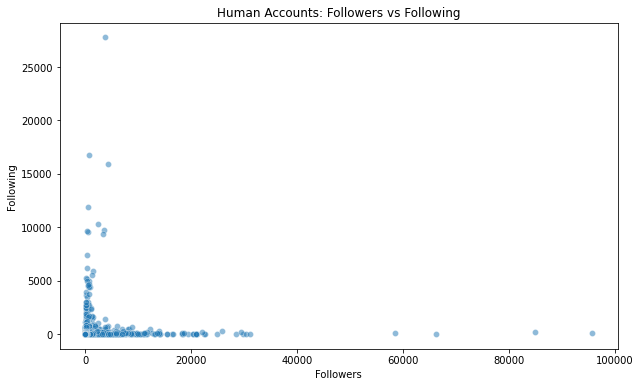

In [15]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=human_data, x='followers', y='following', alpha=0.5)
plt.title("Human Accounts: Followers vs Following")
plt.xlabel("Followers")
plt.ylabel("Following")
plt.show()